# Sesiunea 3: Exploratory Data Analysis (EDA)

## Ce este EDA?

**Exploratory Data Analysis** = Analiza Exploratorie a Datelor

Este procesul prin care:
1. **Înțelegem** structura și conținutul datelor
2. **Vizualizăm** distribuțiile și pattern-urile
3. **Identificăm** relații între variabile
4. **Formulăm** ipoteze pentru analize ulterioare

**Dataset:** `eusilc_clean.csv` - datele curate din Sesiunea 2

## Obiectivele noastre

1. **Analiza univariată** - Înțelegerea fiecărei variabile individual
2. **Analiza bivariată** - Relații între două variabile
3. **Gruparea datelor** - Comparații între categorii
4. **Vizualizări** - Grafice pentru înțelegere și comunicare

---
## Partea 1: Încărcarea Datelor
---

In [2]:
# Importăm bibliotecile necesare
import pandas as pd
import numpy as np

# Setări pentru afișare
pd.set_option('display.max_columns', 20)

In [3]:
# Încărcăm datele curate din sesiunea anterioară
df = pd.read_csv('../datasets/eusilc_clean.csv')

print(f"Am încărcat {df.shape[0]} rânduri și {df.shape[1]} coloane")

Am încărcat 5775 rânduri și 9 coloane


In [4]:
# Verificăm primele rânduri
df.head()

,an_sondaj,tara,id_gospodarie,venit_total,venit_munca,numar_membri,marime_echivalenta,numar_camere,grad_urbanizare
0,2013,EE,7,0,-32.0,5.0,1.0,2,4.0
1,2013,EE,24,3324,3320.0,6.0,1.0,2,1.0
2,2013,EE,49,7805,7488.0,3.0,1.0,1,1.0
3,2013,EE,52,16688,15222.0,6.0,1.0,1,4.0
4,2013,EE,79,74,57.0,2.0,1.0,2,1.0


In [5]:
# Verificăm că nu avem valori lipsă
print("Valori lipsă per coloană:")
print(df.isnull().sum())

Valori lipsă per coloană:
an_sondaj             0
tara                  0
id_gospodarie         0
venit_total           0
venit_munca           0
numar_membri          0
marime_echivalenta    0
numar_camere          0
grad_urbanizare       0
dtype: int64


---
## Partea 2: Concepte Statistice de Bază
---

### Ce sunt statisticile descriptive?

Statisticile descriptive ne ajută să **rezumăm** datele în câteva numere cheie.

Există două categorii principale:

**1. Măsuri de tendință centrală** (unde e "centrul" datelor):
- **Media** (mean) - suma valorilor împărțită la numărul de valori
- **Mediana** (median) - valoarea din mijloc când datele sunt ordonate
- **Moda** (mode) - valoarea care apare cel mai frecvent

**2. Măsuri de dispersie** (cât de "împrăștiate" sunt datele):
- **Deviația standard** (std) - cât de departe sunt valorile de medie
- **Minim și Maxim** - valorile extreme
- **Quartile** - împart datele în 4 părți egale

### Media vs Mediana - Care e diferența?

**Exemplu simplu:**

Venituri: [1000, 2000, 3000, 4000, **50000**]

- **Media** = (1000+2000+3000+4000+50000) / 5 = **12,000**
- **Mediana** = valoarea din mijloc = **3,000**

**Concluzie:**
- Media este **sensibilă** la valori extreme (outliers)
- Mediana este **robustă** - nu e afectată de outliers
- Când Media > Mediana → avem valori foarte mari care trag media în sus

### Quartile - Ce sunt?

**Quartilele** împart datele ordonate în **4 părți egale**:

```
   25%      25%      25%      25%
|-------|-------|-------|-------|
Min    Q1      Q2      Q3     Max
       (25%)  (50%)   (75%)
              Mediana
```

- **Q1 (25%)** = 25% din valori sunt sub această valoare
- **Q2 (50%)** = Mediana - 50% sunt sub, 50% peste
- **Q3 (75%)** = 75% din valori sunt sub această valoare
- **IQR** = Q3 - Q1 = intervalul în care se află 50% din date (mijlocul)

---
## Partea 3: Analiza Venitului Total
---

### Metoda `.mean()` - Calcularea mediei

**Ce face:** Calculează media aritmetică (suma / numărul de valori).

**Sintaxa:**
```python
df['coloana'].mean()
```

In [6]:
# Calculăm media venitului total
media_venit = df['venit_total'].mean()

print(f"Media venitului total: {media_venit:.2f} EUR")

Media venitului total: 14621.99 EUR


### Metoda `.median()` - Calcularea medianei

**Ce face:** Returnează valoarea din mijloc când datele sunt ordonate.

**Sintaxa:**
```python
df['coloana'].median()
```

In [7]:
# Calculăm mediana venitului total
mediana_venit = df['venit_total'].median()

print(f"Mediana venitului total: {mediana_venit:.2f} EUR")

Mediana venitului total: 10500.00 EUR


### Comparăm media cu mediana

In [8]:
# Comparație media vs mediana
print(f"Media:   {media_venit:.2f} EUR")
print(f"Mediana: {mediana_venit:.2f} EUR")
print(f"Diferența: {media_venit - mediana_venit:.2f} EUR")

Media:   14621.99 EUR
Mediana: 10500.00 EUR
Diferența: 4121.99 EUR


### Interpretare: Media vs Mediana

**Ce observăm:**
- Media (~14,600 EUR) este mai mare decât Mediana (~10,500 EUR)
- Diferența este de ~4,100 EUR

**Ce înseamnă:**
- Distribuția veniturilor este **asimetrică la dreapta** (right-skewed)
- Există gospodării cu venituri **foarte mari** care trag media în sus
- **Mediana** (10,500 EUR) este un indicator mai bun al venitului "tipic"
- Jumătate din gospodării câștigă sub 10,500 EUR pe an

### Metoda `.std()` - Deviația standard

**Ce face:** Măsoară cât de **împrăștiate** sunt valorile în jurul mediei.

**Interpretare:**
- Std mic → valorile sunt **apropiate** de medie
- Std mare → valorile sunt **împrăștiate** departe de medie

**Sintaxa:**
```python
df['coloana'].std()
```

In [9]:
# Calculăm deviația standard
std_venit = df['venit_total'].std()

print(f"Deviația standard: {std_venit:.2f} EUR")

Deviația standard: 13363.06 EUR


### Interpretare: Deviația Standard

**Ce observăm:**
- Std = ~13,360 EUR (aproape la fel de mare ca media!)

**Ce înseamnă:**
- Veniturile sunt **foarte împrăștiate** - variabilitate mare
- Există diferențe mari între gospodării
- Unele gospodării au venituri foarte mici, altele foarte mari

### Metoda `.min()` și `.max()` - Valori extreme

**Ce fac:** Returnează valoarea minimă și maximă.

**Sintaxa:**
```python
df['coloana'].min()
df['coloana'].max()
```

In [10]:
# Valorile extreme
minim = df['venit_total'].min()
maxim = df['venit_total'].max()

print(f"Venitul minim: {minim:.2f} EUR")
print(f"Venitul maxim: {maxim:.2f} EUR")
print(f"Diferența (range): {maxim - minim:.2f} EUR")

Venitul minim: -37048.00 EUR
Venitul maxim: 131049.00 EUR
Diferența (range): 168097.00 EUR


### Interpretare: Valori Extreme

**Ce observăm:**
- Minim = **-37,048 EUR** (valoare negativă!)
- Maxim = **131,049 EUR**
- Range = ~168,000 EUR

**Ce înseamnă:**
- Valoarea negativă = **pierderi din afaceri** (am discutat în sesiunea de curățare)
- Diferența enormă între min și max arată **inegalitate mare**
- Cea mai bogată gospodărie câștigă de ~3.5 ori mai mult decât media

### Metoda `.quantile()` - Calcularea quartilelor

**Ce face:** Returnează valoarea la o anumită percentilă.

**Sintaxa:**
```python
df['coloana'].quantile(0.25)   # Q1 (25%)
df['coloana'].quantile(0.50)   # Q2 (50%) = Mediana
df['coloana'].quantile(0.75)   # Q3 (75%)
```

In [11]:
# Calculăm quartilele
q1 = df['venit_total'].quantile(0.25)
q2 = df['venit_total'].quantile(0.50)  # = mediana
q3 = df['venit_total'].quantile(0.75)
iqr = q3 - q1

print(f"Q1 (25%): {q1:.2f} EUR")
print(f"Q2 (50%): {q2:.2f} EUR (mediana)")
print(f"Q3 (75%): {q3:.2f} EUR")
print(f"IQR (Q3 - Q1): {iqr:.2f} EUR")

Q1 (25%): 5142.00 EUR
Q2 (50%): 10500.00 EUR (mediana)
Q3 (75%): 19913.50 EUR
IQR (Q3 - Q1): 14771.50 EUR


### Interpretare: Quartile

**Ce observăm:**
- Q1 = ~5,142 EUR → 25% din gospodării câștigă sub această sumă
- Q2 = ~10,500 EUR → 50% câștigă sub această sumă (mediana)
- Q3 = ~19,914 EUR → 75% câștigă sub această sumă
- IQR = ~14,772 EUR → intervalul în care se află 50% din gospodării

**Ce înseamnă pentru Estonia 2013:**
- O gospodărie "tipică" (mijlocul distribuției) câștigă între **5,142 și 19,914 EUR/an**
- Asta înseamnă aproximativ **428-1,660 EUR/lună** pentru întreaga gospodărie
- 25% din gospodării trăiesc cu mai puțin de **428 EUR/lună**

### Metoda `.describe()` - Toate statisticile odată

**Ce face:** Calculează automat toate statisticile principale.

**Returnează:** count, mean, std, min, 25%, 50%, 75%, max

In [12]:
# Toate statisticile pentru venit_total
print("Statistici descriptive pentru venit_total:")
print(df['venit_total'].describe())

Statistici descriptive pentru venit_total:
count      5775.000000
mean      14621.991342
std       13363.055834
min      -37048.000000
25%        5142.000000
50%       10500.000000
75%       19913.500000
max      131049.000000
Name: venit_total, dtype: float64


---
## Partea 4: Vizualizarea Distribuțiilor
---

### De ce vizualizăm datele?

Statisticile descriptive sunt utile, dar **graficele** ne arată:
- **Forma** distribuției (simetrică, asimetrică)
- **Outliers** (valori extreme)
- **Pattern-uri** care nu se văd în numere

### Histograma - Distribuția unei variabile

**Ce este:**
- Împarte valorile în **intervale** (bins)
- Arată **câte valori** sunt în fiecare interval

**Cum o interpretăm:**
- **Vârf** = unde sunt cele mai multe valori
- **Coadă** = valori rare, extreme
- **Right-skewed** = coadă lungă la dreapta (valori mari rare)

<Axes: title={'center': 'Distribuția venitului total'}, ylabel='Frequency'>

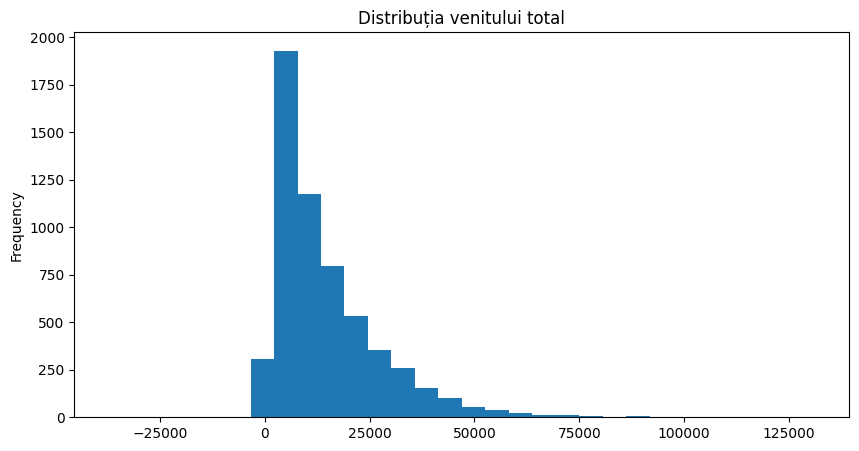

In [13]:
# Histogramă pentru venit_total
df['venit_total'].plot(
    kind='hist',
    bins=30,
    figsize=(10, 5),
    title='Distribuția venitului total'
)

### Interpretare: Histograma Veniturilor

**Ce vedem în grafic:**
- **Vârful** distribuției este în zona 0-15,000 EUR
- Există o **coadă lungă la dreapta** (venituri mari, dar rare)
- Câteva gospodării au **venituri negative** (stânga zero)

**Ce înseamnă:**
- Majoritatea gospodăriilor au venituri **modeste** (sub 20,000 EUR/an)
- Puține gospodării au venituri **foarte mari** (peste 50,000 EUR)
- Distribuția este **inegală** - nu e o "curbă normală"

### Boxplot - Vizualizarea quartilelor și outliers

**Ce arată un boxplot:**

```
              ┌───────┐
    ○         │       │         ○
  outlier   ──┤   │   ├──    outlier
              │       │
              └───────┘
             Q1  Q2  Q3
           (cutia)
```

- **Cutia** = intervalul Q1-Q3 (50% din date)
- **Linia din cutie** = mediana (Q2)
- **Mustățile** = extinderea datelor (fără outliers)
- **Punctele** = outliers (valori extreme)

<Axes: title={'center': 'Boxplot: Venit total'}>

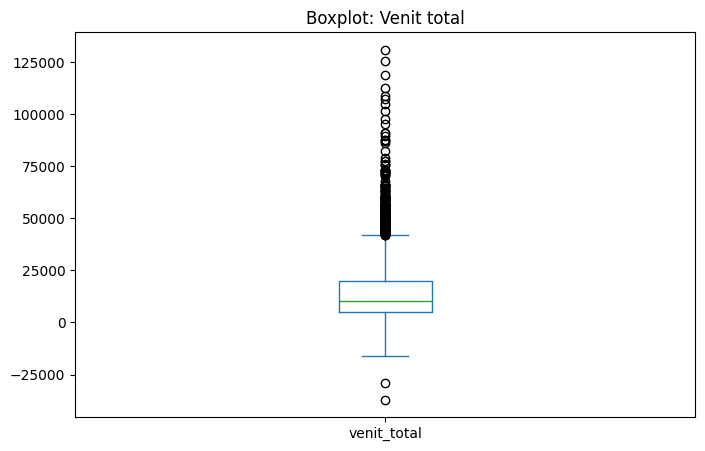

In [14]:
# Boxplot pentru venit_total
df['venit_total'].plot(
    kind='box',
    figsize=(8, 5),
    title='Boxplot: Venit total'
)

### Interpretare: Boxplot Venituri

**Ce vedem în grafic:**
- **Cutia** (50% din date) este între ~5,000 și ~20,000 EUR
- **Mediana** (linia din cutie) ≈ 10,500 EUR
- **Outliers sus** (puncte) = gospodării cu venituri foarte mari (peste ~40,000 EUR)
- **Outliers jos** = gospodării cu venituri negative sau foarte mici

**Ce înseamnă:**
- Majoritatea gospodăriilor sunt concentrate într-un interval relativ îngust
- Există un număr semnificativ de **gospodării foarte bogate** (outliers)
- Acești outliers **trag media în sus** față de mediană

---
## Partea 5: Analiza Variabilelor Categoriale
---

### Ce sunt variabilele categoriale?

**Variabile categoriale** = au un număr limitat de valori posibile (categorii).

Exemple din datele noastre:
- `grad_urbanizare`: 1=Urban dens, 2=Urban mediu, 3=Urban mic, 4=Rural
- `numar_membri`: 1, 2, 3, etc.

### Metoda `.value_counts()` pentru categorii

**Ce face:** Numără câte observații sunt în fiecare categorie.

**Sintaxa:**
```python
df['coloana'].value_counts()                    # numere absolute
df['coloana'].value_counts(normalize=True)      # procente (0-1)
df['coloana'].value_counts(normalize=True) * 100  # procente (0-100)
```

In [15]:
# Distribuția numărului de membri
print("Număr gospodării per mărime:")
print(df['numar_membri'].value_counts().sort_index())

Număr gospodării per mărime:
numar_membri
1.0      31
1.5       2
2.0    1006
3.0    1333
4.0    1664
5.0     974
6.0     765
Name: count, dtype: int64


In [33]:
# Același lucru în procente
print("Procent gospodării per mărime:")
procente = df['numar_membri'].value_counts(normalize=True).sort_index() * 100
print(procente.round(5))

Procent gospodării per mărime:
numar_membri
1.0     0.53680
1.5     0.03463
2.0    17.41991
3.0    23.08225
4.0    28.81385
5.0    16.86580
6.0    13.24675
Name: proportion, dtype: float64


### Interpretare: Mărimea Gospodăriilor

**Ce observăm:**
- Cele mai frecvente sunt gospodăriile cu **4 membri** (28.8%)
- Urmate de cele cu **3 membri** (23.1%) și **2 membri** (17.4%)
- Gospodăriile cu **1 membru** sunt foarte rare (0.5%)
- Există și gospodării mari cu **5-6 membri** (~30% împreună)

**Ce înseamnă pentru Estonia:**
- Familia "tipică" din Estonia (2013) are **3-4 membri**
- Persoanele singure sunt **foarte rare** în dataset
- Aceasta poate reflecta structura socială sau modul de colectare a datelor

<Axes: title={'center': 'Distribuția mărimii gospodăriilor'}, xlabel='numar_membri'>

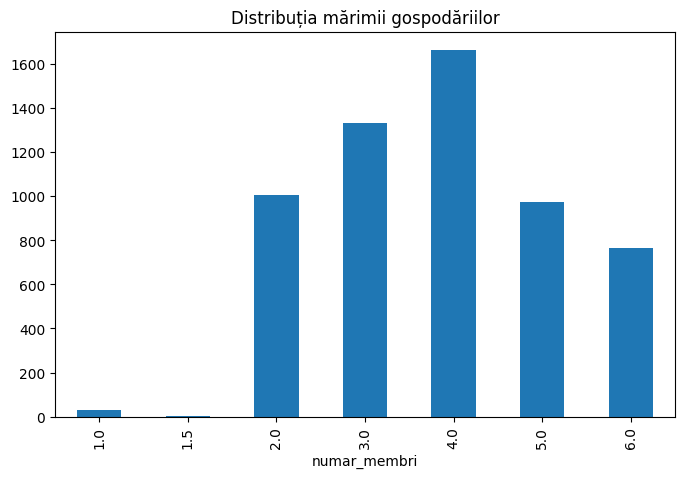

In [17]:
# Bar plot pentru număr membri
df['numar_membri'].value_counts().sort_index().plot(
    kind='bar',
    figsize=(8, 5),
    title='Distribuția mărimii gospodăriilor'
)

In [18]:
# Distribuția gradului de urbanizare
print("Grad urbanizare (1=Urban dens, 4=Rural):")
print(df['grad_urbanizare'].value_counts().sort_index())
print()
print("În procente:")
print((df['grad_urbanizare'].value_counts(normalize=True).sort_index() * 100).round(1))

Grad urbanizare (1=Urban dens, 4=Rural):
grad_urbanizare
1.0    1722
2.0     467
3.0     396
4.0    3190
Name: count, dtype: int64

În procente:
grad_urbanizare
1.0    29.8
2.0     8.1
3.0     6.9
4.0    55.2
Name: proportion, dtype: float64


### Interpretare: Urbanizare

**Ce observăm:**
- **55% din gospodării** sunt în zone **rurale** (cod 4)
- **30% sunt în zone urban dense** (cod 1)
- Restul (~15%) sunt în zone intermediare

**Ce înseamnă pentru Estonia:**
- Estonia este o țară cu populație **preponderent rurală**
- Această distribuție va afecta analizele ulterioare
- Trebuie să ținem cont de acest lucru când comparăm venituri

---
## Partea 6: Analiza Bivariată - Relații între Variabile
---

### Ce este analiza bivariată?

**Analiza bivariată** = studierea relației dintre **două** variabile.

Întrebări pe care le punem:
- Gospodăriile mai mari au venituri mai mari?
- Există diferențe de venit între urban și rural?
- Numărul de camere e legat de venit?

### Metoda `.groupby()` - Gruparea datelor

**Ce face:** Împarte datele în grupuri și calculează statistici pentru fiecare grup.

**Sintaxa:**
```python
df.groupby('coloana_grupare')['coloana_analizata'].mean()
df.groupby('coloana_grupare')['coloana_analizata'].median()
```

**Exemplu:** Media venitului pentru fiecare grad de urbanizare.

In [19]:
# Venit mediu pe grad de urbanizare
venit_per_urbanizare = df.groupby('grad_urbanizare')['venit_total'].mean()

print("Venit mediu pe grad de urbanizare:")
print(venit_per_urbanizare.round(0))

Venit mediu pe grad de urbanizare:
grad_urbanizare
1.0    15285.0
2.0    16710.0
3.0    10651.0
4.0    14452.0
Name: venit_total, dtype: float64


### Metoda `.agg()` - Mai multe statistici odată

**Ce face:** Calculează mai multe statistici pentru fiecare grup.

**Sintaxa:**
```python
df.groupby('grupare')['coloana'].agg(['mean', 'median', 'count'])
```

In [20]:
# Mai multe statistici pentru venit pe urbanizare
statistici_urbanizare = df.groupby('grad_urbanizare')['venit_total'].agg(
    ['mean', 'median', 'std', 'count']
)
statistici_urbanizare.columns = ['Media', 'Mediana', 'Std', 'Numar']

print("Statistici venit pe grad urbanizare:")
print(statistici_urbanizare.round(0))

Statistici venit pe grad urbanizare:
                   Media  Mediana      Std  Numar
grad_urbanizare                                  
1.0              15285.0  11025.0  14302.0   1722
2.0              16710.0  13162.0  12914.0    467
3.0              10651.0   7574.0   9562.0    396
4.0              14452.0  10264.0  13205.0   3190


### Interpretare: Venit vs Urbanizare

**Ce observăm:**

| Grad | Media | Mediana | Interpretare |
|:-----|------:|--------:|:-------------|
| 1 (Urban dens) | 15,285 | 11,025 | Venituri mari, dar inegale |
| 2 (Urban mediu) | 16,710 | 13,162 | Cele mai mari venituri! |
| 3 (Urban mic) | 10,651 | 7,574 | Cele mai mici venituri |
| 4 (Rural) | 14,452 | 10,265 | Venituri medii |

**Concluzie:**
- **Surpriză!** Zona rural (4) nu are cele mai mici venituri
- Zonele **urban mic** (3) au cele mai mici venituri
- Zonele **urban mediu** (2) au cele mai mari venituri
- Diferențele între medie și mediană arată **inegalitate** în toate zonele

<Axes: title={'center': 'venit_total'}, xlabel='grad_urbanizare'>

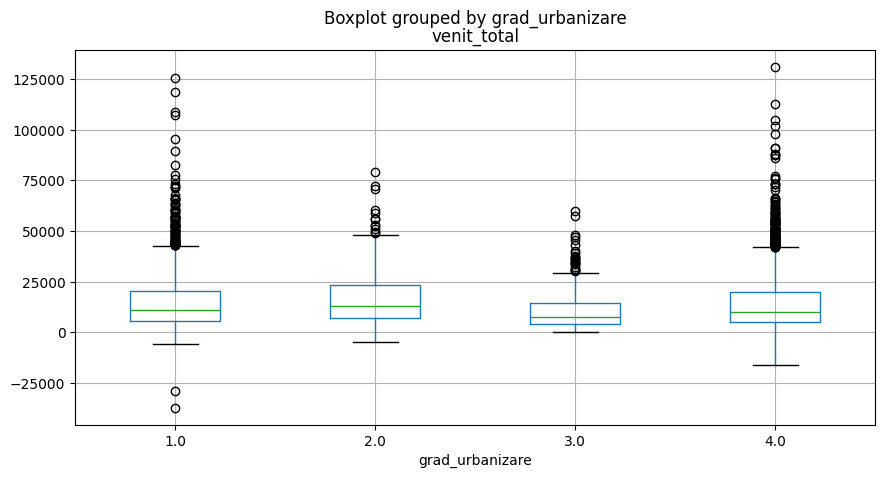

In [21]:
# Boxplot: venit pe grad urbanizare
df.boxplot(
    column='venit_total',
    by='grad_urbanizare',
    figsize=(10, 5)
)

### Analiza: Venit vs Număr membri

In [22]:
# Venit mediu pe număr de membri
venit_per_membri = df.groupby('numar_membri')['venit_total'].agg(
    ['mean', 'median', 'count']
)
venit_per_membri.columns = ['Media', 'Mediana', 'Numar']

print("Venit pe număr de membri:")
print(venit_per_membri.round(0))

Venit pe număr de membri:
                Media  Mediana  Numar
numar_membri                         
1.0            7384.0   4026.0     31
1.5            4028.0   4028.0      2
2.0           12541.0   8322.0   1006
3.0           13398.0   9490.0   1333
4.0           14814.0  10550.0   1664
5.0           16251.0  12850.0    974
6.0           17321.0  13836.0    765


### Interpretare: Venit vs Mărime Gospodărie

**Ce observăm:**
- Venitul **crește** odată cu numărul de membri
- Gospodăriile cu 1 membru: ~7,384 EUR
- Gospodăriile cu 6 membri: ~17,321 EUR

**Ce înseamnă:**
- Este **logic**: mai mulți membri = mai multe surse de venit
- Dar atenție: venitul **per persoană** poate fi mai mic în familiile mari
- Gospodăriile mici (1-2 membri) au venituri mai mici, dar și costuri mai mici

<Axes: title={'center': 'Venit mediu pe număr de membri'}, xlabel='numar_membri'>

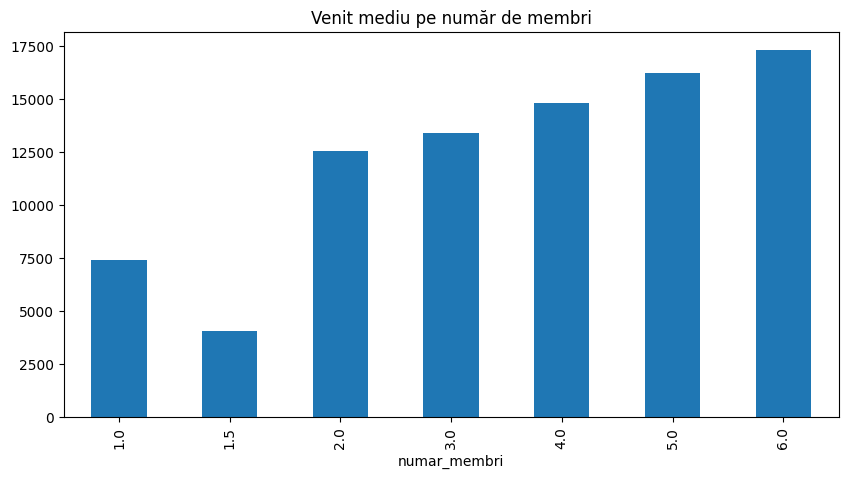

In [23]:
# Vizualizare: bar plot cu venit mediu pe mărime gospodărie
venit_per_membri['Media'].plot(
    kind='bar',
    figsize=(10, 5),
    title='Venit mediu pe număr de membri'
)

---
## Partea 7: Corelația între Variabile
---

### Ce este corelația?

**Corelația** măsoară **cât de puternic** sunt legate două variabile.

**Valori posibile:** de la **-1** la **+1**

| Valoare | Interpretare |
|:--------|:-------------|
| +1 | Corelație pozitivă perfectă (când una crește, cealaltă crește) |
| +0.7 | Corelație pozitivă puternică |
| +0.3 | Corelație pozitivă slabă |
| 0 | Fără corelație (variabilele nu sunt legate) |
| -0.3 | Corelație negativă slabă |
| -0.7 | Corelație negativă puternică |
| -1 | Corelație negativă perfectă (când una crește, cealaltă scade) |

### Metoda `.corr()` - Calcularea corelației

**Ce face:** Calculează corelația între două variabile sau între toate variabilele.

**Sintaxa:**
```python
# Corelația între două variabile
df['var1'].corr(df['var2'])

# Matricea de corelație (toate variabilele)
df.corr()
```

In [24]:
# Corelația dintre venit_total și numar_membri
corr = df['venit_total'].corr(df['numar_membri'])

print(f"Corelația venit - număr membri: {corr:.3f}")

Corelația venit - număr membri: 0.124


### Interpretare: Corelația Venit - Membri

**Rezultat:** r = 0.124 (corelație pozitivă **slabă**)

**Ce înseamnă:**
- Există o legătură **slabă** între mărimea gospodăriei și venit
- Gospodăriile mai mari **tind** să aibă venituri mai mari, dar relația nu e puternică
- Alte factori (educație, ocupație, locație) sunt probabil mai importanți

In [25]:
# Corelația venit_total cu venit_munca
corr_munca = df['venit_total'].corr(df['venit_munca'])

print(f"Corelația venit_total - venit_munca: {corr_munca:.3f}")

Corelația venit_total - venit_munca: 0.970


### Interpretare: Corelația Venit Total - Venit Muncă

**Rezultat:** r = 0.970 (corelație pozitivă **foarte puternică**)

**Ce înseamnă:**
- Venitul din muncă reprezintă **sursa principală** de venit pentru majoritatea gospodăriilor
- Aproape tot venitul total vine din muncă
- Alte surse (pensii, ajutoare sociale, investiții) contribuie mai puțin

In [26]:
# Matricea de corelație
variabile_numerice = ['venit_total', 'venit_munca', 'numar_membri', 'numar_camere']
matrice_corelatie = df[variabile_numerice].corr()

print("Matricea de corelație:")
print(matrice_corelatie.round(2))

Matricea de corelație:
              venit_total  venit_munca  numar_membri  numar_camere
venit_total          1.00         0.97          0.12         -0.17
venit_munca          0.97         1.00          0.11         -0.15
numar_membri         0.12         0.11          1.00         -0.10
numar_camere        -0.17        -0.15         -0.10          1.00


### Interpretare: Matricea de Corelație

**Observații importante:**
1. **venit_total - venit_munca = 0.97** → aproape identice
2. **venit_total - numar_camere = -0.17** → corelație negativă slabă (!)
3. **numar_membri - numar_camere = -0.10** → aproape fără legătură

**Surpriză:**
- Venitul este **ușor negativ** corelat cu numărul de camere
- Aceasta poate indica că gospodăriile din mediul rural au mai multe camere dar venituri mai mici

---
## Partea 8: Crearea Quintilelor de Venit
---

### Ce sunt quintilele?

**Quintilele** împart datele în **5 grupuri egale** (fiecare cu 20% din observații).

```
   20%     20%     20%     20%     20%
|------|------|------|------|------|
  Q1      Q2      Q3      Q4      Q5
(sărac)                        (bogat)
```

**De ce le folosim:**
- Pentru a compara grupuri de venit (săraci vs bogați)
- Pentru a măsura inegalitatea

### Funcția `pd.qcut()` - Împărțirea în quantile

**Ce face:** Împarte datele în grupuri cu număr egal de observații.

**Sintaxa:**
```python
pd.qcut(df['coloana'], q=5, labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5'])
```

**Parametri:**
- `q=5` = împarte în 5 grupuri (quintile)
- `labels` = numele grupurilor

In [27]:
# Creăm quintilele de venit
df['quintila'] = pd.qcut(
    df['venit_total'],
    q=5,
    labels=['Q1 (sarac)', 'Q2', 'Q3', 'Q4', 'Q5 (bogat)']
)

print("Distribuția pe quintile:")
print(df['quintila'].value_counts().sort_index())

Distribuția pe quintile:
quintila
Q1 (sarac)    1155
Q2            1156
Q3            1154
Q4            1155
Q5 (bogat)    1155
Name: count, dtype: int64


In [28]:
# Venit pentru fiecare quintilă
limite_quintile = df.groupby('quintila', observed=True)['venit_total'].agg(['min', 'max', 'mean'])
limite_quintile.columns = ['Venit Min', 'Venit Max', 'Venit Mediu']

print("Limitele quintilelor:")
print(limite_quintile.round(0))

Limitele quintilelor:
            Venit Min  Venit Max  Venit Mediu
quintila                                     
Q1 (sarac)     -37048       4077       2620.0
Q2               4078       8067       6130.0
Q3               8070      13677      10671.0
Q4              13689      22991      17767.0
Q5 (bogat)      23011     131049      35925.0


### Interpretare: Quintilele de Venit

**Ce observăm:**

| Quintilă | Venit Min | Venit Max | Venit Mediu | Descriere |
|:---------|----------:|----------:|------------:|:----------|
| Q1 (săraci) | -37,048 | 4,077 | 2,620 | Cei mai săraci 20% |
| Q2 | 4,078 | 8,067 | 6,130 | Venituri mici |
| Q3 | 8,070 | 13,677 | 10,671 | Clasa de mijloc |
| Q4 | 13,689 | 22,991 | 17,767 | Venituri bune |
| Q5 (bogați) | 23,011 | 131,049 | 35,925 | Cei mai bogați 20% |

**Ce înseamnă:**
- **Q1** include și gospodării cu pierderi (venituri negative)
- **Q5** are un range foarte mare (23,000 - 131,000) → inegalitate și în top
- Diferența între Q1 și Q5 este **enormă** (2,620 vs 35,925 EUR)

In [29]:
# Calculăm raportul Q5/Q1
venit_q1 = df[df['quintila'] == 'Q1 (sarac)']['venit_total'].mean()
venit_q5 = df[df['quintila'] == 'Q5 (bogat)']['venit_total'].mean()

raport = venit_q5 / venit_q1

print(f"Venit mediu Q1 (săraci): {venit_q1:.0f} EUR")
print(f"Venit mediu Q5 (bogați): {venit_q5:.0f} EUR")
print(f"\nRaport Q5/Q1: {raport:.1f}x")

Venit mediu Q1 (săraci): 2620 EUR
Venit mediu Q5 (bogați): 35925 EUR

Raport Q5/Q1: 13.7x


### Interpretare: Raportul Q5/Q1

**Rezultat:** Raport Q5/Q1 = **13.7x**

**Ce înseamnă:**
- Cei mai bogați 20% câștigă de **13.7 ori** mai mult decât cei mai săraci 20%
- Aceasta indică un nivel **ridicat de inegalitate**

**Context internațional:**
- În țările nordice (Suedia, Norvegia): raportul e ~4-5x
- În SUA: raportul e ~8-10x
- Estonia 2013 avea inegalitate **mai mare** decât media europeană

<Axes: title={'center': 'venit_total'}, xlabel='quintila'>

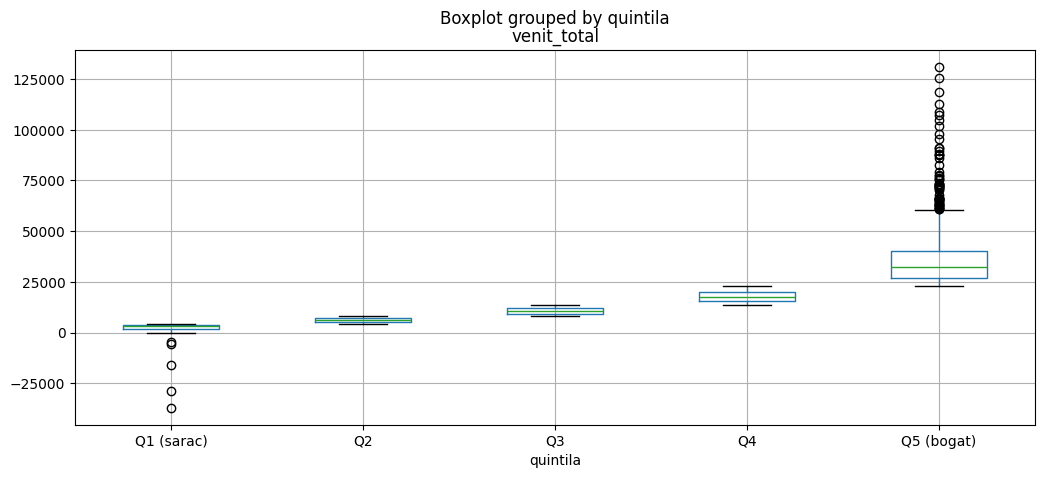

In [30]:
# Boxplot pentru venit pe quintile
df.boxplot(
    column='venit_total',
    by='quintila',
    figsize=(12, 5)
)

---
## Partea 9: Analiza Combinată
---

In [31]:
# Crosstab: quintilă vs urbanizare
tabel = pd.crosstab(
    df['quintila'],
    df['grad_urbanizare'],
    normalize='index'
) * 100

print("Distribuția urbanizării per quintilă (procente):")
print(tabel.round(1))

Distribuția urbanizării per quintilă (procente):
grad_urbanizare   1.0   2.0  3.0   4.0
quintila                              
Q1 (sarac)       27.7   5.5  9.5  57.2
Q2               29.2   6.1  8.6  56.2
Q3               30.1   9.0  6.9  54.0
Q4               31.1   9.4  5.9  53.6
Q5 (bogat)       31.1  10.4  3.4  55.2


### Interpretare: Quintilă vs Urbanizare

**Ce observăm:**
- În **Q1 (săraci)**: 57% sunt din rural, 28% din urban dens
- În **Q5 (bogați)**: 55% sunt din rural, 31% din urban dens
- Zona **urban mic (3)** scade de la 9.5% (Q1) la 3.4% (Q5)

**Concluzie:**
- Distribuția urban/rural este relativ **similară** între quintile
- Diferența majoră: zona **urban mic** are proporție mai mare în quintilele sărace
- **Ruralul** nu e neapărat mai sărac - sunt gospodării bogate și în rural

---
## Partea 10: Salvarea Rezultatelor
---

In [32]:
# Salvăm dataset-ul cu quintilele adăugate
df.to_csv('../datasets/eusilc_with_quintiles.csv', index=False)

print("Dataset salvat: eusilc_with_quintiles.csv")

Dataset salvat: eusilc_with_quintiles.csv


---
## Recapitulare: Ce am descoperit despre Estonia (2013)
---

### Principalele concluzii

**1. Distribuția veniturilor:**
- Venitul median = **10,500 EUR/an** (~875 EUR/lună per gospodărie)
- Distribuție **asimetrică** (right-skewed) - puțini foarte bogați
- 50% din gospodării câștigă între 5,142 și 19,914 EUR/an

**2. Inegalitate:**
- Raport Q5/Q1 = **13.7x** - inegalitate ridicată
- Cei mai bogați 20% câștigă în medie 35,925 EUR
- Cei mai săraci 20% câștigă în medie 2,620 EUR

**3. Structura gospodăriilor:**
- Mărimea tipică: **3-4 membri**
- Gospodăriile mai mari au venituri totale mai mari
- Corelația venit-mărime este slabă (r=0.12)

**4. Urban vs Rural:**
- 55% din gospodării sunt în zone rurale
- Surpriză: zonele **urban mic** au cele mai mici venituri
- Zonele **urban mediu** au cele mai mari venituri

**5. Sursa venitului:**
- Corelația venit_total - venit_munca = **0.97**
- Aproape tot venitul vine din muncă

### Funcții pandas învățate

| Funcție | Ce face | Exemplu |
|:--------|:--------|:--------|
| `.mean()` | Calculează media | `df['col'].mean()` |
| `.median()` | Calculează mediana | `df['col'].median()` |
| `.std()` | Deviația standard | `df['col'].std()` |
| `.quantile()` | Quartile | `df['col'].quantile(0.25)` |
| `.describe()` | Toate statisticile | `df['col'].describe()` |
| `.value_counts()` | Numără categorii | `df['col'].value_counts()` |
| `.groupby()` | Grupează datele | `df.groupby('a')['b'].mean()` |
| `.agg()` | Mai multe funcții | `df.groupby('a').agg(['mean', 'count'])` |
| `.corr()` | Corelația | `df['a'].corr(df['b'])` |
| `pd.qcut()` | Împarte în quantile | `pd.qcut(df['col'], q=5)` |
| `pd.crosstab()` | Tabel de contingență | `pd.crosstab(df['a'], df['b'])` |